This notebook generates figures illustrating reference rollouts at different values of c for a randomly sampled initial condition of the wave equation with Dirichlet boundary conditions, as described in Supplementary Material Section 3.

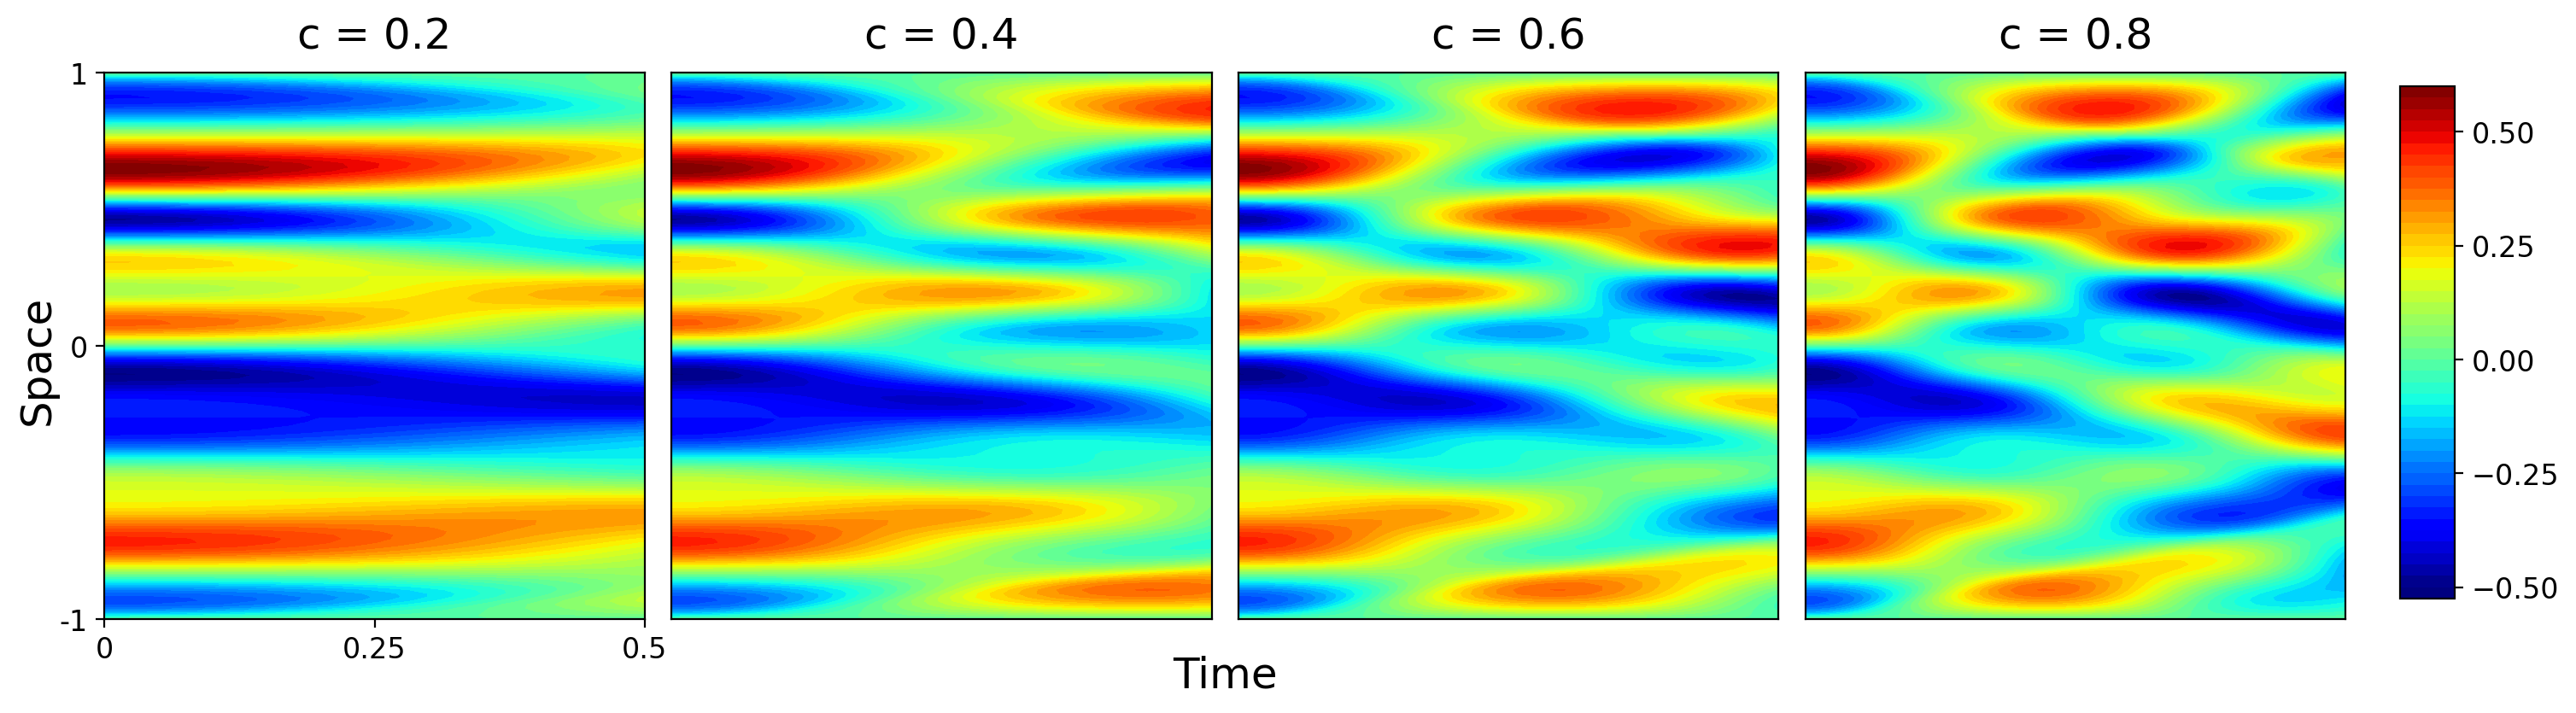

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2, 3"
os.environ["TOKENIZERS_PARALLELISM"] = "false"
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
from wave_equation import (
    compute_exact_solution_random_ic_vary_Nx,
    visualize_spline_ic
)

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

# Parameters
L = 2
c_values = [0.2, 0.4, 0.6, 0.8]
T = 0.5
Nx = 14
Nt = 25

init_cond_random = np.random.uniform(-0.5, 0.5, size=Nx)
fig, cs = visualize_spline_ic(L, Nx, init_cond_random)
plt.close()
fig, axes = plt.subplots(1, len(c_values), figsize=(16, 4), dpi=200)
vmin_global = float('inf')
vmax_global = float('-inf')
contour_plots = []

for idx, c in enumerate(c_values):
    u_coarse, u_fine, x_fine, t_fine = compute_exact_solution_random_ic_vary_Nx(
        L, c, T, Nx, Nt, spline_obj=cs, return_fine=True)
    vmin_global = min(vmin_global, u_fine.min())
    vmax_global = max(vmax_global, u_fine.max())
    cf = axes[idx].contourf(t_fine, x_fine, u_fine.T, levels=50, cmap='jet')
    contour_plots.append(cf)
    axes[idx].set_title(f'c = {c}', fontsize=18, pad=10)
    if idx == 0:
        axes[idx].set_xticks([0, 0.25, 0.5])
        axes[idx].set_xticklabels([0, 0.25, 0.5], fontsize=12)
        axes[idx].set_yticks([-1, 0, 1])
        axes[idx].set_yticklabels([-1, 0, 1], fontsize=12)
    else:
        axes[idx].set_xticks([])
        axes[idx].set_yticks([])

fig.text(0.47, 0.02, 'Time', ha='center', fontsize=18)
fig.text(0.028, 0.5, 'Space', va='center', rotation='vertical', fontsize=18)
plt.subplots_adjust(left=0.06, right=0.88, top=0.92, bottom=0.12, wspace=0.05)
for cf in contour_plots:
    cf.set_clim(vmin_global, vmax_global)
cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.75])
cbar = fig.colorbar(contour_plots[-1], cax=cbar_ax)
cbar.locator = plt.MaxNLocator(nbins=5)
cbar.update_ticks()
cbar.ax.tick_params(labelsize=12)
plt.show()